In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

Binomial distribution is a <i>discrete probability distribution</i> of the number of successes in a sequence of $n$

##### Materials

- [When to use Binomial versus Beta distribution?](https://gr33ndata.medium.com/when-to-use-binomial-versus-beta-distribution-8fd4a68c99bf)


## PMF - Probability Mass Function
> PMF is used to describe the discrete probability distributions

#### Formula

$f(k) = \begin{pmatrix}n\cr k\cr\end{pmatrix}p^k(1-p)^{n-k}$ <br><br>
Binomial distribution takes the parameters of:
- The probability of a single success as $p$
- An amount of obsevations as $n$
- An amount of observations with success result as $k$
- By default Binomial PMF is defined in standardized form and is can be shifted by $loc$ parameter

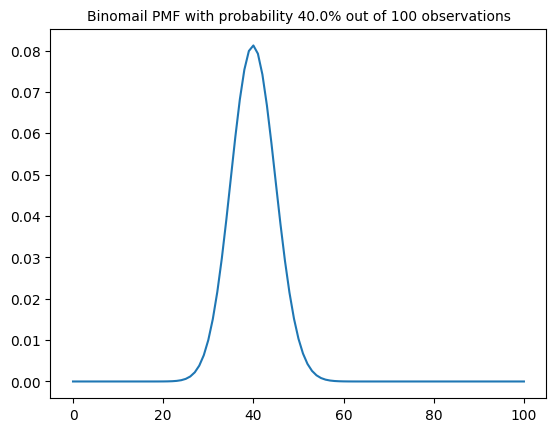

In [77]:
n = 100 # number of observations
p = .4 # probability of success result
# X scale from 0 to 100
x = np.arange(0, n+1)

plt.plot(
    x,
    stats.binom.pmf(k=x, n=n, p=p)
)
plt.title(f'Binomail PMF with probability {p*100}% out of {n} observations', fontsize=10);


## RVS - Random Variable Sample


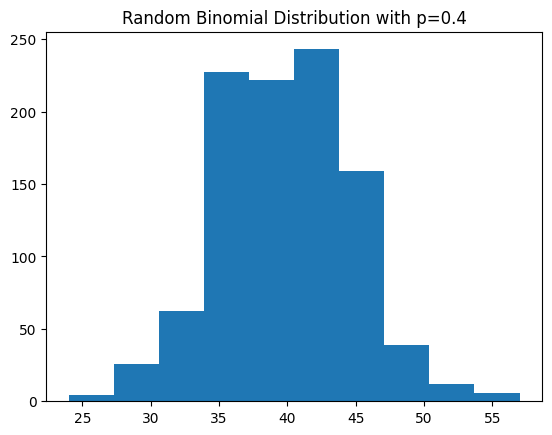

In [195]:
n = 100 # number of observations
p = .4 # probability of success result

plt.hist(stats.binom.rvs(n=n, p=p, size=1000))
plt.title(f'Random Binomial Distribution with p={p}');


## PPF - Percent Point Function
- Inverse of $cdf$
- Returns a data point from a declared percentile

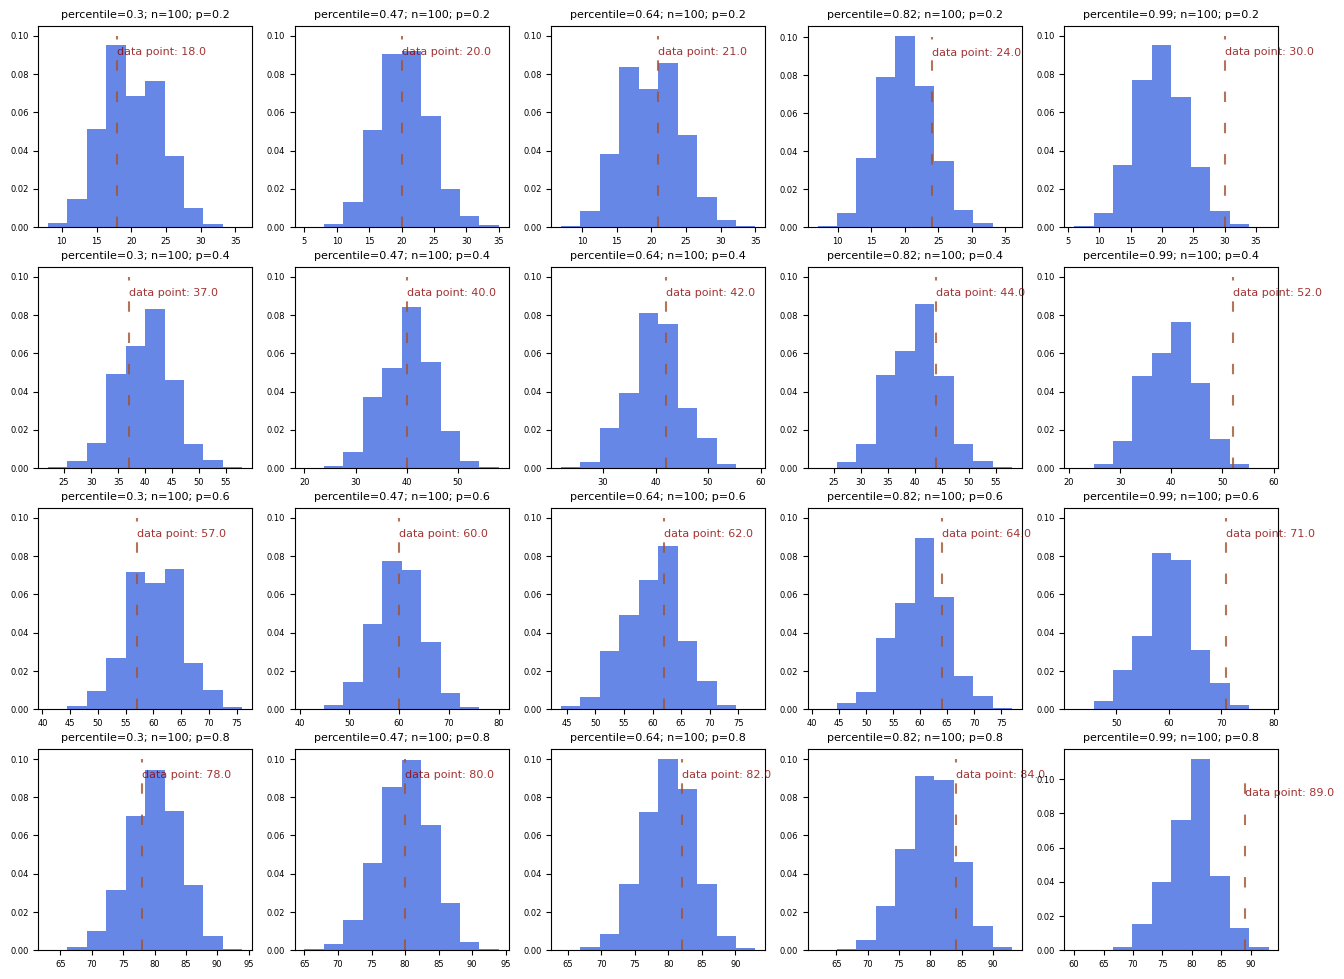

In [167]:
size = 10000
n = 100 # number of observations
probability_list = np.linspace(0, 1, 6)[1:-1]
percentile_list = np.linspace(0.3, .99, 5)

fig, axs = plt.subplots(4, 5, figsize=(16, 12)) 
for index_prob, value_prob in enumerate(probability_list):
    for index_perc, value_perc in enumerate(percentile_list):
        data_point = round(stats.binom.ppf(q=value_perc, n=n, p=value_prob), 2)

        axs[index_prob, index_perc].hist(stats.binom.rvs(n=n, p=value_prob, size=size), density=True, color='royalblue', alpha=.8)
        axs[index_prob, index_perc].set_title(f'percentile={round(value_perc, 2)}; n={n}; p={round(value_prob, 1)}', fontsize=8)
        axs[index_prob, index_perc].tick_params(labelsize=6)
        axs[index_prob, index_perc].vlines(data_point, 0, .1, color='sienna', alpha=.8, linestyle=(0, (5, 10)))
        axs[index_prob, index_perc].annotate(f'data point: {data_point}', xy=(data_point, 0.09), color='darkred', alpha=.8, fontsize=8)

plt.show();


## CDF - Cumulative Density Function
- Inverse of $ppf$
- Returns a percentile from a declared data point


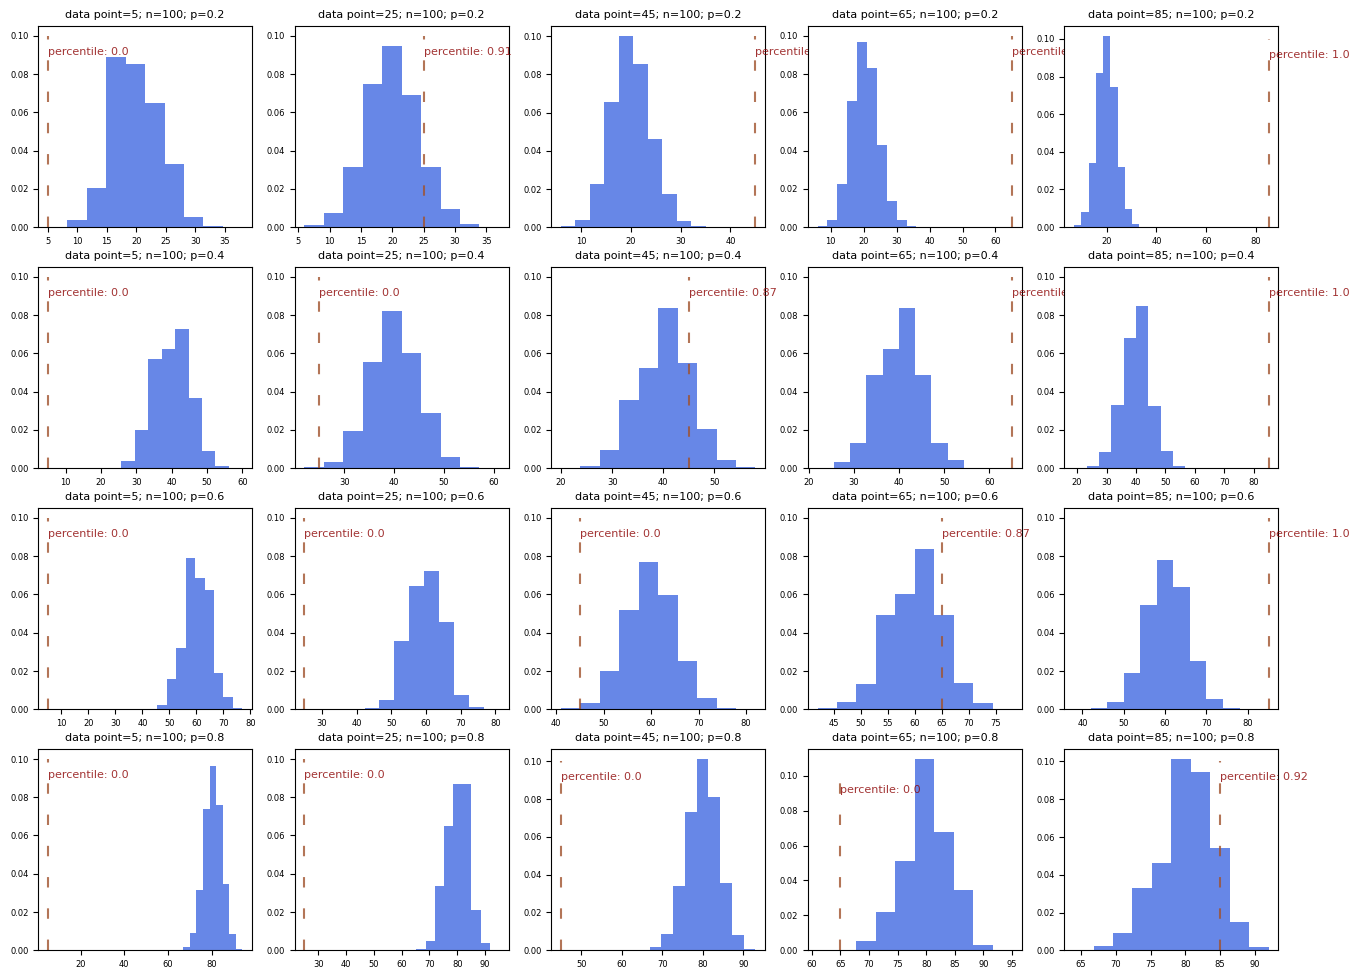

In [188]:
size = 10000
n = 100 # number of observations
probability_list = np.linspace(0, 1, 6)[1:-1]
data_point_list = np.arange(5, 90, 20)

fig, axs = plt.subplots(4, 5, figsize=(16, 12)) 
for index_prob, value_prob in enumerate(probability_list):
    for index_point, value_point in enumerate(data_point_list):
        percentile_value = round(stats.binom.cdf(k=value_point, n=n, p=value_prob), 2)

        axs[index_prob, index_point].hist(stats.binom.rvs(n=n, p=value_prob, size=size), density=True, color='royalblue', alpha=.8)
        axs[index_prob, index_point].set_title(f'data point={value_point}; n={n}; p={round(value_prob, 1)}', fontsize=8)
        axs[index_prob, index_point].tick_params(labelsize=6)
        axs[index_prob, index_point].vlines(value_point, 0, .1, color='sienna', alpha=.8, linestyle=(0, (5, 10)))
        axs[index_prob, index_point].annotate(f'percentile: {percentile_value}', xy=(value_point, 0.09), color='darkred', alpha=.8, fontsize=8)

plt.show();

### CDF & PMF Comparison

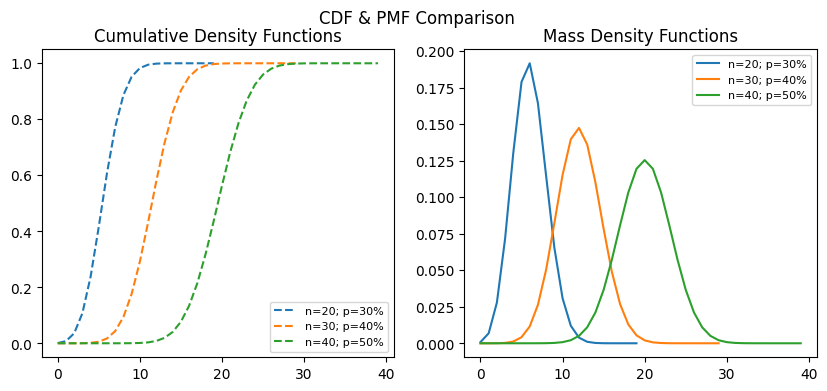

In [239]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4)) 

plt.suptitle('CDF & PMF Comparison')

axs[0].set_title('Cumulative Density Functions')
axs[0].plot(stats.binom.cdf(k=np.arange(0, 20), n=20, p=.3), linestyle='--', label='n=20; p=30%')
axs[0].plot(stats.binom.cdf(k=np.arange(0, 30), n=30, p=.4), linestyle='--', label='n=30; p=40%')
axs[0].plot(stats.binom.cdf(k=np.arange(0, 40), n=40, p=.5), linestyle='--', label='n=40; p=50%')
axs[0].legend(fontsize=8)

axs[1].set_title('Mass Density Functions')
axs[1].plot(stats.binom.pmf(k=np.arange(0, 20), n=20, p=.3), linestyle='-', label='n=20; p=30%')
axs[1].plot(stats.binom.pmf(k=np.arange(0, 30), n=30, p=.4), linestyle='-', label='n=30; p=40%')
axs[1].plot(stats.binom.pmf(k=np.arange(0, 40), n=40, p=.5), linestyle='-', label='n=40; p=50%')
axs[1].legend(fontsize=8)

plt.show();